### ~ Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- As we see there is no missong values and all the data is categorical.

In [5]:
df["DiabPercentage"] = df["DiabetesPedigreeFunction"]
df.drop(["DiabetesPedigreeFunction"], axis = 1, inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
DiabPercentage,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42


### ~ Statistical Analysis

- As we know The mean indicates the average of a feature, but the median represents the middle value when the set is in order.
- In the first 4 features and the last one, the mean is close to the median (50%) in this situation the distribution is approximately symmetric and normally distributed. We will verify it with the visualisation.
- For the rest of the features,  the distribution of the data is skewed. 

### ~ Data Visualisation

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:>

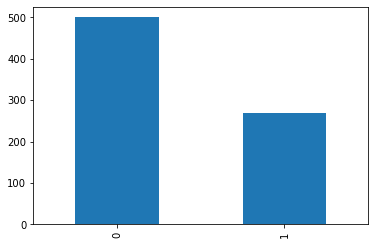

In [7]:
print(df['Outcome'].value_counts())
df['Outcome'].value_counts().plot(kind='bar')

- The result is not equal

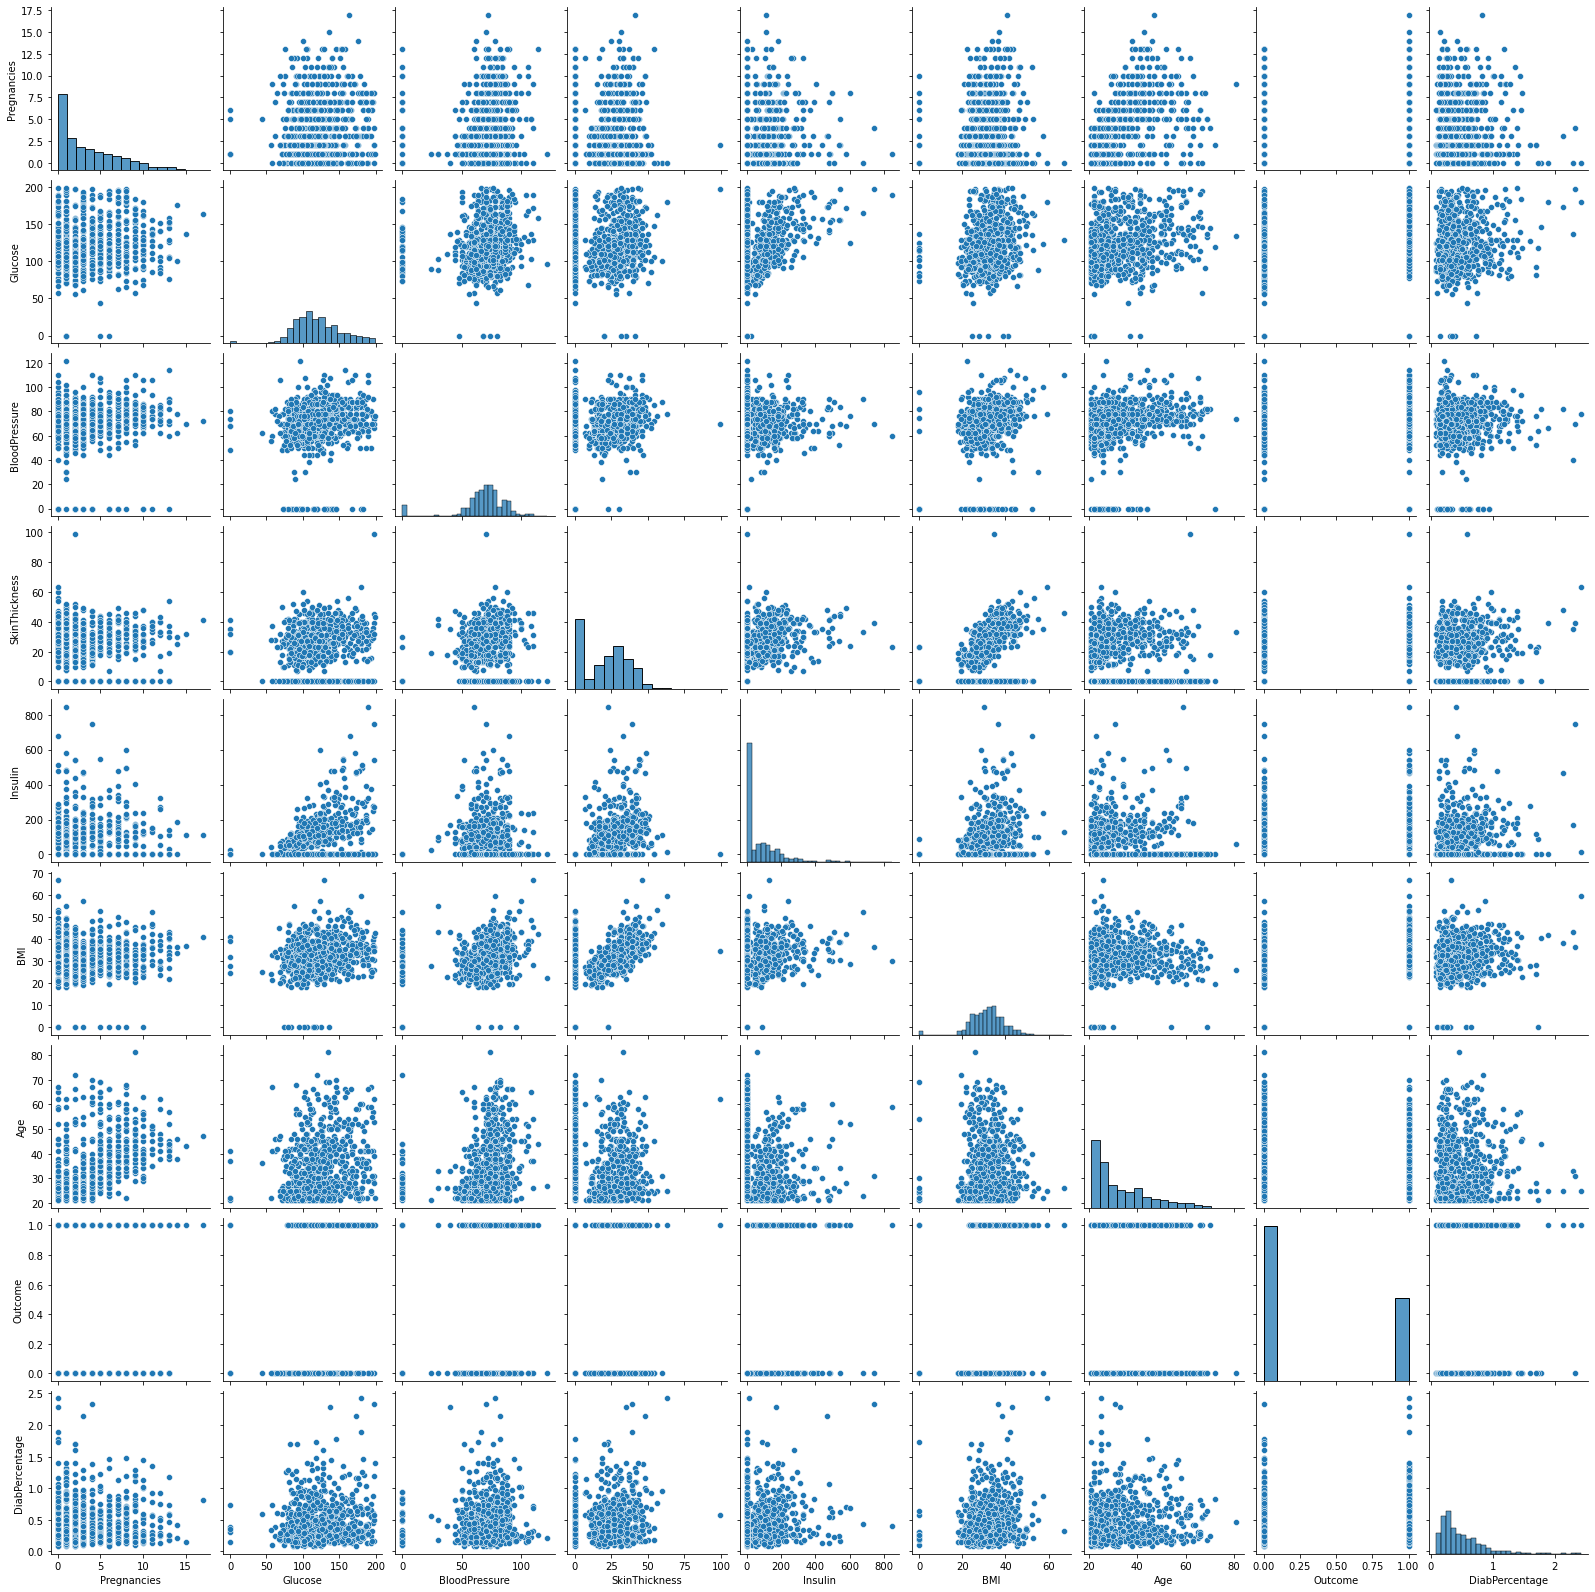

In [8]:
sns.pairplot(df)

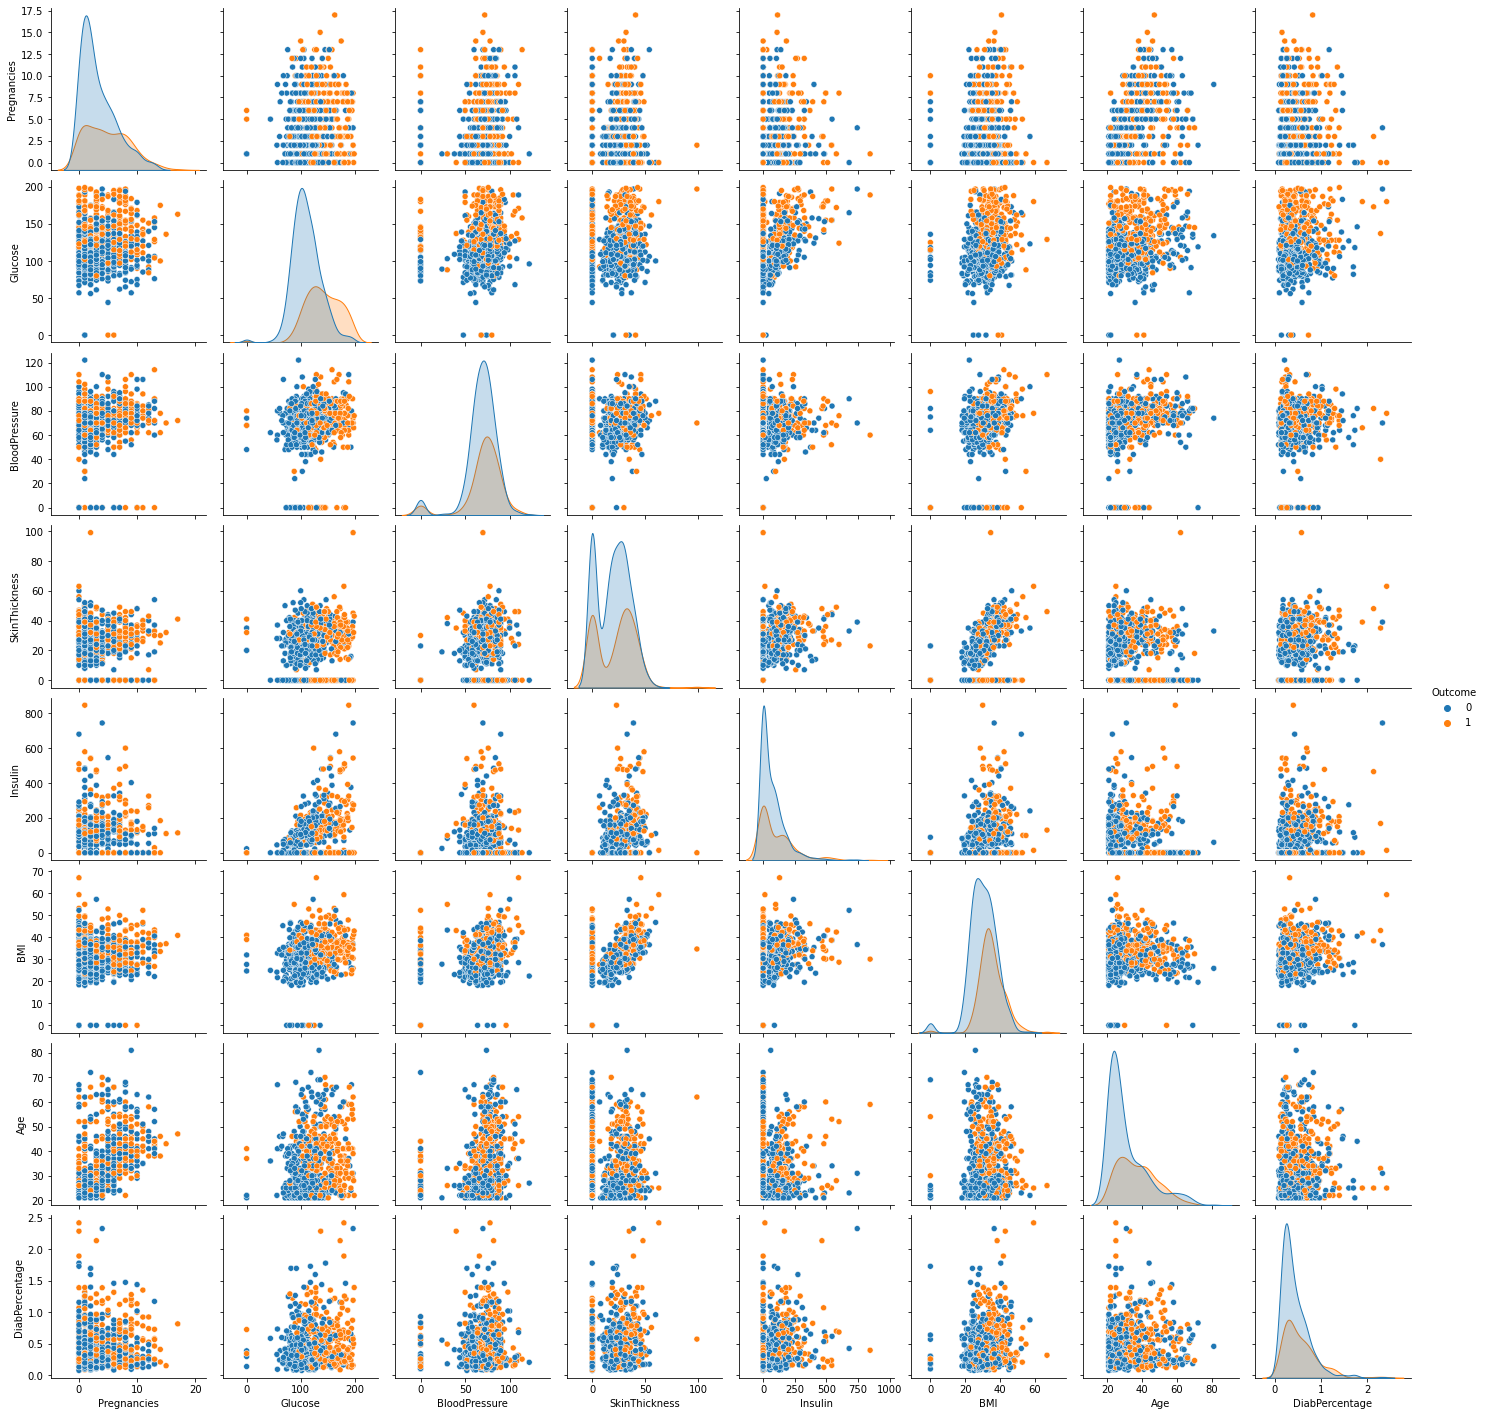

In [9]:
sns.pairplot(df, hue='Outcome')

- The orange points represent the distribution of the Diabetes comparing with every feature.

<Figure size 576x576 with 0 Axes>

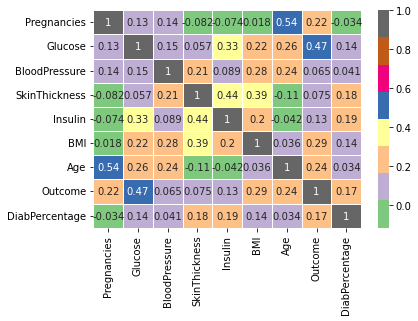

<Figure size 576x576 with 0 Axes>

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = "Accent",linewidth=.5)
plt.figure(figsize = (8,8))

- As we see the last 3 visualisation gives us informations about the correlation, and the conclusion is no features to drop because the correlation is low in the two directions.

### ~ Checking outlayers

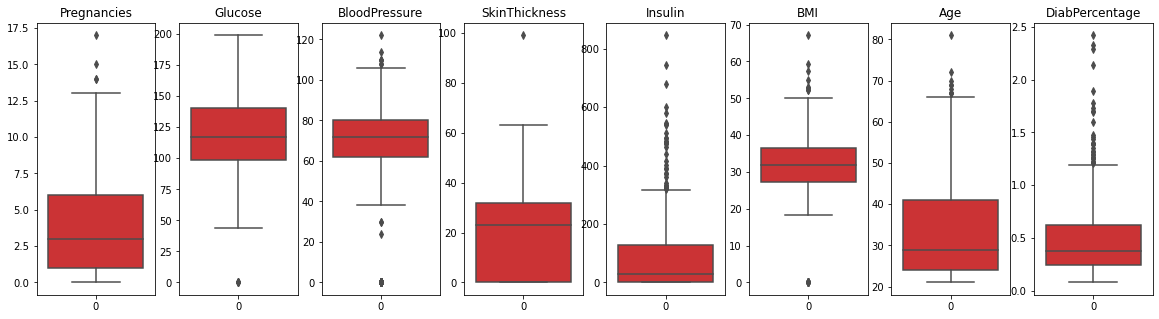

In [11]:
vars = df.drop(["Outcome"], axis = 1).columns

fig, axs = plt.subplots(1, len(vars), figsize=(20, 5))

for i, var in enumerate(vars):
    sns.boxplot(data=df[var], ax=axs[i], palette="Set1")
    axs[i].set_title(var)

plt.show()

- As we see almost all the features have many outliers except Glucose, which leads us to do the Feature scaling.

### ~ Feature Scaling

- I will be using RobustScaler beceause it's less sensitive to outliers.

In [12]:
scaler = RobustScaler()
data_to_scale = df.drop(["Outcome"], axis = 1)
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns, index=data_to_scale.index)

In [13]:
A = data_to_scale.columns.to_list()
for var in A:
    df[var] = scaled_df[var]

# ~ Splitting Data

In [14]:
X = df.drop(["Outcome"], axis = 1) 
y = df["Outcome"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ~ Modeling

We will be using 6 different classification models:
- LinearSVC
- RidgeClassification
- KNN
- GaussianNB
- DecisionTreeClassifier
- RandomForest

In [16]:
model1 = LinearSVC(max_iter=10000)
model2 = RidgeClassifier()
model3 = KNeighborsClassifier()
model4 = GaussianNB()
model5 = DecisionTreeClassifier()
model6 = RandomForestClassifier()

In [17]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
ac = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy = ",ac,"\t Mean Absolute Error = ",mae)

Accuracy =  0.8246753246753247 	 Mean Absolute Error =  0.17532467532467533


# LinearSVC 
- accuracy = 0.8246753246753247
- Mean absolute error = 0.17532467532467533

In [18]:
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
ac = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy = ",ac,"\t Mean Absolute Error = ",mae)

Accuracy =  0.8311688311688312 	 Mean Absolute Error =  0.16883116883116883


# RidgeClassifier
- accuracy = 0.8311688311688312
- Mean absolute error = 0.16883116883116883

In [19]:
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
ac = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy = ",ac,"\t Mean Absolute Error = ",mae)

Accuracy =  0.7857142857142857 	 Mean Absolute Error =  0.21428571428571427


# KNN 
- accuracy = 0.7857142857142857
- Mean absolute error = 0.21428571428571427

In [20]:
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
ac = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy = ",ac,"\t Mean Absolute Error = ",mae)

Accuracy =  0.7922077922077922 	 Mean Absolute Error =  0.2077922077922078


# GaussianNB 
- accuracy = 0.7922077922077922
- Mean absolute error = 0.2077922077922078

In [21]:
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
ac = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy = ",ac,"\t Mean Absolute Error = ",mae)

Accuracy =  0.7597402597402597 	 Mean Absolute Error =  0.24025974025974026


# DecisionTreeClassifier 
- accuracy = 0.7792207792207793
- Mean absolute error = 0.22077922077922077
- Mean squared error = 0.22077922077922077

In [22]:
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
ac = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy = ",ac,"\t Mean Absolute Error = ",mae)

Accuracy =  0.8116883116883117 	 Mean Absolute Error =  0.18831168831168832


# RandomForestClassifier 
- accuracy = 0.7922077922077922
- Mean absolute error = 0.2077922077922078

---> As a conclusion RidgeClassifier has the best result for classifying diabetics